Department of Physics, University of Pisa (AA 2022-2023)

### Multimessenger Physics Laboratory tutorial series



## Exercise 1 - using OOP to create a Spectral Fitting Factory
#### (M. Razzano, Mar 4, 2023)

In this exercise you will have to use Object Oriented Programming to create a class that can do these things:

* Read data from CSV or FITS Format
* Fit to a model
* Plot data and model
* Compute residuals

### Basic Setup
In the cell below you should import the modules that you think you will require (suggestion: Numpy and pandas)

In [1]:
#Put here your import
import os
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

# Import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

from astropy.io import fits

### Design your class - Methods

First, you should think about the tasks that your class should do, in particular

* Read a data file (you can find data files in the data directory)
* Plot the data
* fit a function
* Plot the model
* ....what else?

**Note** Choose a name...SpectralFitter, SpectralFactory, etc...?

In [2]:
#put here, as comments, a list of functions that you would like to have with possible function names

# Read the data (read_data)

# Plot the data (plot_data)

# Fit a function (fit_func)

# PLot the model

# Compute residuals

# Plot residuals

# Compute chi squared

### Design your class - Member variables
Also, you should think about the member variable associated to your class, e.g.

* The name of the file containing data
* The array with data
* ...what else?

In [3]:
#put here, as comments, a list of member variabels, with possible initial names

# Name of input file (input_filename)

# Model function (model_func)

# Initial parameters for fitting (initial_guess)

### Outline of your class

Now it is time to draft your class, by putting the methods and member functions
*Important* Do not forget the constructor!

In [54]:
class SpectralFitter:
    def __init__(self, model_func):
        self.model_func = model_func # inizializzo la classe dicendo la funzione modello del fit
        print("Eseguo fit con %s" % model_func) # printo quale funzione sto usando
    
    def read_data(self, input_filename):
        data = np.loadtxt(input_filename) # legge un file txt, ritorna una tupla con due colonne
        x_data = data[:,0] # array di dati dalla prima colonna
        y_data = data[:,1] # array di dati dalla seconda colonna
        return x_data, y_data
    
    def fit_data(self, x_data, y_data, sigma_y, initial_guess):
        popt, pcov = curve_fit(self.model_func, x_data, y_data, sigma=sigma_y, p0=initial_guess, absolute_sigma=True) # fa il fit
        
        return popt, pcov   
    
    def plot_data(self, x_data, y_data, sigma_y, initial_guess):
        popt, pcov = self.fit_data(x_data, y_data, sigma_y, initial_guess)
        plt.figure()
        
        # Main plot (subplot 1)
        plt.subplot(2, 1, 1)
        plt.errorbar(x_data, y_data, yerr=sigma_y, fmt='b.', label='data')
        x_fit = np.linspace(min(x_data), max(x_data), 100)
        plt.plot(x_fit, self.model_func(x_fit, *popt), 'r-', label='fit')
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.title("Fit")
        plt.legend()
        plt.minorticks_on()
        
        # Residuals plot (subplot 2)
        plt.subplot(2, 1, 2)
        plt.plot(x_data, self.residuals(x_data, y_data, sigma_y), 'b.')
        plt.xlabel("X")
        plt.ylabel("Norm. Res.")
        plt.title("Residuals")
        plt.grid()
        plt.axhline(0., linestyle='--', color='red')
        plt.minorticks_on()

        # Adjust layout and display the figure
        plt.subplots_adjust(hspace=0.6) # Adjust vertical spacing between subplots
        plt.show(block=True)

    def residuals(self, x_data, y_data, sigma_y):
        popt, _ = self.fit_data(x_data, y_data, sigma_y, initial_guess)
        res = (y_data - self.model_func(x_data, *popt)) / sigma_y
        return res
        
    def chisq_data(self, x_data, y_data, sigma_y):
        popt, pcov = self.fit_data(x_data, y_data, sigma_y, initial_guess)  # Assicurati che initial_guess sia definito
        chisqr = sum((y_data - self.model_func(x_data, *popt))**2 / sigma_y**2)
        dof = len(y_data) - len(popt)
        chisqr_red = chisqr / dof
        for i in range(len(popt)):
            print("p_%d =" % i, popt[i], "+/-", pcov[i,i]**0.5) # printo parametri di best fit ed errori
        print(f'Reduced chi^2 = {chisqr_red}')
        return chisqr
        
    def save_results(self, plot_filename, txt_filename, x_data, y_data, sigma_y, initial_guess):
        popt, pcov = self.fit_data(x_data, y_data, sigma_y, initial_guess)
        chisqr = self.chisq_data
        self.plot_data(x_data, y_data, sigma_y, initial_guess)
        
        plt.savefig(plot_filename)
        plt.close()
        with open(txt_filename, 'w') as file:
            for i in range(len(popt)):
                file.write(f'Parameter {i}: {popt[i]} +/- {pcov[i,i]**0.5}\n')
            file.write("Chi quadro ridotto: %f" % chisqr)
        

### Time to use the class - CSV File

Istantiate an object of your class to read the ASCII txt file in the data directory. Use it to plot and fit the profile with a Gauss function 
(in this case you should add a fit_gauss methods to your class, then RELOAD the cell to make changes effective)

**Note** Data in this TXT file comes with an header in the first line and then data in 2 columns

Results dir is /home/jovyan/homework-03-basics-of-object-oriented-programming-chiaramasia01/results
Eseguo fit con <function gauss at 0x7faad6615040>


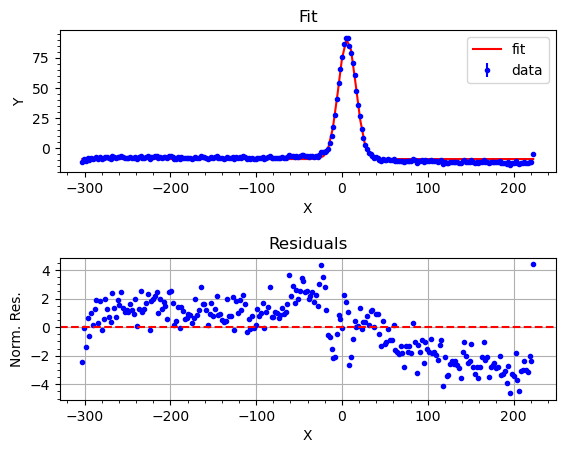

p_0 = 99.81039428867264 +/- 0.4171348266921921
p_1 = 6.070876867810454 +/- 0.04868275530672168
p_2 = 10.15159149275979 +/- 0.04959878871141385
p_3 = -9.171118704372633 +/- 0.06596520251343127
Reduced chi^2 = 3.7467693537698654


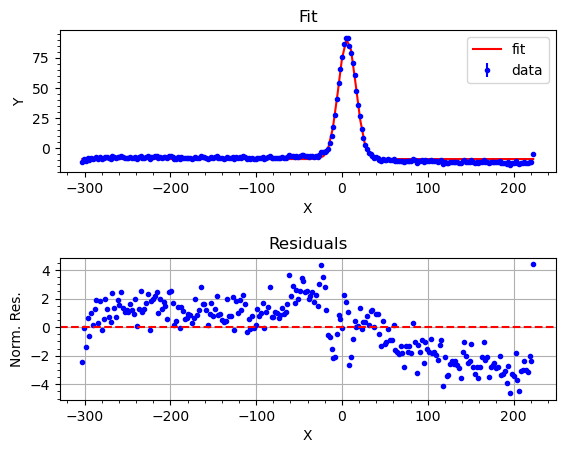

TypeError: must be real number, not method

In [55]:
tutorials_dir = os.getcwd()
main_dir = os.path.dirname(tutorials_dir)
data_dir = os.path.join(main_dir,"data")
results_dir = os.path.join(main_dir,"results")

if not os.path.exists(results_dir):
    os.mkdir(results_dir)
    
print("Results dir is %s" %results_dir)

# definisco la funzione modello per un fit gaussiano

def gauss(x, p0, p1, p2, p3): # p0 = ampiezza; p1 = media; p2 = deviazione standard; p3 = costante generica
    return p0 * np.exp(- ((x - p1)/p2)**2 / 2.0) + p3

# creo un'istanza della classe
spectral_fitter = SpectralFitter(gauss)

# file da cui prendo i dati
input_filename = os.path.join(data_dir,"salsa-brage-spectrum_50577.txt")

# leggo i dati
x_data, y_data = spectral_fitter.read_data(input_filename)
sigma_y = np.ones(len(x_data))
initial_guess = [92, 6, 9, -10]

# nomi dei file risultati
plot_filename = os.path.join(results_dir, 'plot.png')
txt_filename = os.path.join(results_dir, 'fit_parameters.txt')

# richiamo le funzioni
spectral_fitter.plot_data(x_data, y_data, sigma_y, initial_guess)
spectral_fitter.residuals(x_data, y_data, sigma_y)
spectral_fitter.chisq_data(x_data, y_data, sigma_y)
spectral_fitter.save_results(plot_filename, txt_filename, x_data, y_data, sigma_y, initial_guess)

### Time to use the class - FITS File

Repeat the exercise to read the FITS file in the data directory. Use it to plot and fit the profile with a Gauss function 
(in this case you should add a fit_gauss methods to your class, then RELOAD the cell to make changes effective)

**Note** Data in this fits file comes as a spectrum image, i.e. a single row image, so you should fit the image profile, i.e. the intensities along the row. You can use astropy to explore the image, read the header and plot the profile intensity

Filename: /home/jovyan/homework-03-basics-of-object-oriented-programming-chiaramasia01/data/salsa-vale-spectrum_50537.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      39   (256, 1, 1)   int16 (rescales to float32)   


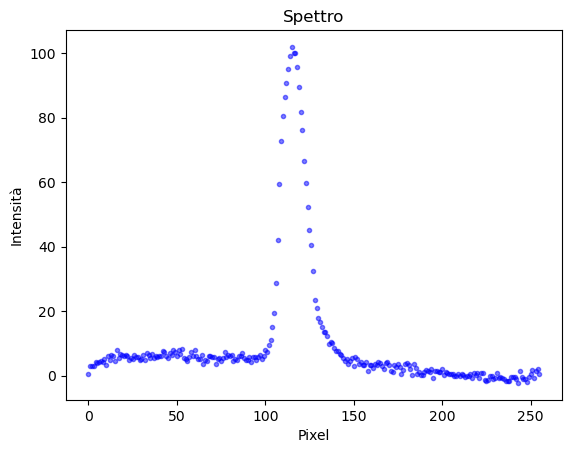

In [6]:
# apro il file e prendo i dati

input_filename = os.path.join(data_dir,"salsa-vale-spectrum_50537.fits")
fits_info = fits.open(input_filename)
fits_info.info()
image_data = fits_info[0].data[0, 0, :]
#size of the image
image_data.shape
x_data = np.linspace(0, len(image_data)-1, len(image_data))
# faccio un plot
plt.errorbar(x_data, image_data, color='blue', fmt='b.', alpha=0.5)  
plt.xlabel('Pixel')
plt.ylabel('Intensità')
plt.title('Spettro')
plt.show()

# Accessing and printing the header information
header = fits_info[0].header

In [32]:
class SpectralFitter:
    def __init__(self, model_func):
        self.model_func = model_func # inizializzo la classe dicendo la funzione modello del fit
        print("Eseguo fit con %s" % model_func) # printo quale funzione sto usando
    
    def read_data(self, input_filename):
        fits_info = fits.open(input_filename)
        fits_info.info()
        y_data = fits_info[0].data[0, 0, :]
        return y_data
    
    def fit_data(self, x_data, y_data, sigma_y, initial_guess):
        popt, pcov = curve_fit(self.model_func, x_data, y_data, sigma=sigma_y, p0=initial_guess, absolute_sigma=True) # fa il fit
        
        return popt, pcov        
        
    def plot_data(self, x_data, y_data, sigma_y, initial_guess):
        popt, pcov = self.fit_data(x_data, y_data, sigma_y, initial_guess)
        plt.errorbar(x_data, y_data, yerr=sigma_y, fmt='b.', label='data')
        x_fit = np.linspace(min(x_data), max(x_data), 100)
        plt.plot(x_fit, self.model_func(x_fit, *popt), 'r-', label='fit')
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.title("Fit")
        plt.legend()
        plt.show()
        
    def residuals(self, x_data, y_data, sigma_y):
        popt, _ = self.fit_data(x_data, y_data, sigma_y, initial_guess)  # Assicurati che initial_guess sia definito
        res = (y_data - self.model_func(x_data, *popt)) / sigma_y
        plt.plot(x_data, res, 'b.')
        plt.axhline(0, color="r")
        plt.xlabel("X")
        plt.ylabel("Norm. Res.")
        plt.title("Residuals")
        plt.grid()
        plt.show()
        
    def chisq_data(self, x_data, y_data, sigma_y):
        popt, pcov = self.fit_data(x_data, y_data, sigma_y, initial_guess)  # Assicurati che initial_guess sia definito
        chisqr = sum((y_data - self.model_func(x_data, *popt))**2 / sigma_y**2)
        dof = len(y_data) - len(popt)
        chisqr_red = chisqr / dof
        for i in range(len(popt)):
            print("p_%d =" % i, popt[i], "+/-", pcov[i,i]**0.5) # printo parametri di best fit ed errori
        print(f'Reduced chi^2 = {chisqr_red}')
        
    def save_results(self, txt_filename, x_data, y_data, sigma_y, initial_guess):
        popt, pcov = self.fit_data(x_data, y_data, sigma_y, initial_guess)
        with open(txt_filename, 'w') as file:
            for i in range(len(popt)):
                file.write(f'Parameter {i}: {popt[i]} +/- {pcov[i,i]**0.5}\n')

Eseguo fit con <function gauss at 0x7faad47c10d0>
Filename: /home/jovyan/homework-03-basics-of-object-oriented-programming-chiaramasia01/data/salsa-vale-spectrum_50537.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      39   (256, 1, 1)   int16 (rescales to float32)   


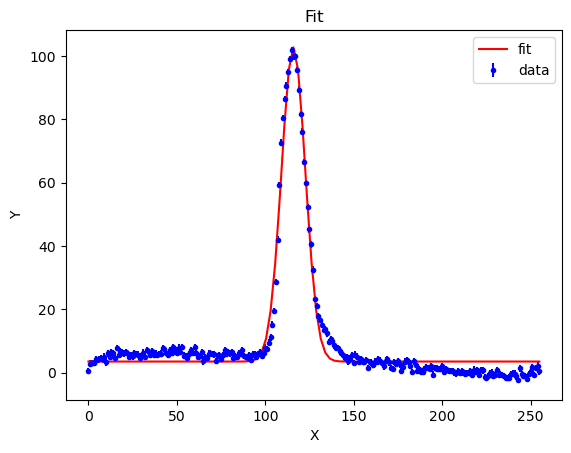

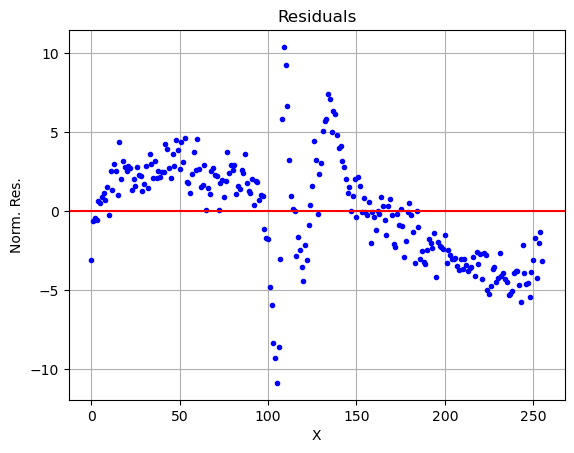

p_0 = 99.33775694651382 +/- 0.35716623281427295
p_1 = 115.91256274831909 +/- 0.027790832551682382
p_2 = 6.754336674009254 +/- 0.02853667430860762
p_3 = 3.464686869153466 +/- 0.06740696448023337
Reduced chi^2 = 10.844266461090934


In [33]:
spectral_fitter = SpectralFitter(gauss)
input_filename = os.path.join(data_dir,"salsa-vale-spectrum_50537.fits")
y_data = spectral_fitter.read_data(input_filename)
x_data = np.linspace(0, len(image_data)-1, len(image_data))
initial_guess = [100, 120, 10, 0]
sigma_y = np.ones(len(x_data))

txt_filename = os.path.join(results_dir, "fit_parameters_fits.pdf")

spectral_fitter.plot_data(x_data, y_data, sigma_y, initial_guess)
spectral_fitter.residuals(x_data, y_data, sigma_y)
spectral_fitter.chisq_data(x_data, y_data, sigma_y)
spectral_fitter.save_results(txt_filename, x_data, y_data, sigma_y, initial_guess)

### Final steps
Congratulations! Don't forget to save your work to Github (using git commit + git push)

In [ ]:
results_dir = os.path.join(main_dir,"results")

if not os.path.exists(results_dir):
    os.mkdir(results_dir)
    
print("Results dir is %s" %results_dir)

Results dir is /home/jovyan/homework-03-basics-of-object-oriented-programming-chiaramasia01/results
